In [108]:
import pandas as pd
import numpy as np
#import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder



import pandas as pd
import numpy as np
#import seaborn as sns
#import pickle
import itertools
import matplotlib.pyplot as plt
#%matplotlib inline
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score

from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [87]:
n=1

In [4]:
cd ..

/Users/alphonsowoodbury/DS/Projects/aw_flatiron_group_projects/Module3_Project


In [127]:
# CLEANED WATER SET

df = pd.read_csv('data/cleaned_water_EDA.csv',index_col=0)
df = df.drop(columns=['latitude','longitude','gps_height'])#,'amount_tsh','population'])

#define classes
df['status_group'] = df['status_group'].replace(to_replace =["functional needs repair", "non functional"],value ="needs repair")
df['status_group'] = df['status_group'].map({'functional': 0, 'needs repair': 1})
#df.head()

###### **if we were to use get_dummies()...**

In [128]:
cat_cols = df.select_dtypes(include=['object','bool']).columns.tolist()
cont_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols,cont_cols

(['funder',
  'installer',
  'basin',
  'region',
  'lga',
  'ward',
  'public_meeting',
  'scheme_management',
  'permit',
  'extraction_type_class',
  'management',
  'payment_type',
  'water_quality',
  'quantity',
  'source',
  'source_class',
  'waterpoint_type'],
 ['status_group', 'amount_tsh', 'population', 'age'])

In [129]:
df_num = df[cont_cols]
df_cat = df[cat_cols]

In [130]:
df_dummies = pd.get_dummies(df_cat, drop_first=True)

df_final = pd.concat([df_num, df_dummies], axis=1)
df_final.shape

(48651, 5472)

In [131]:
df_final.columns

Index(['status_group', 'amount_tsh', 'population', 'age', 'public_meeting',
       'permit', 'funder_A/co Germany', 'funder_Aar', 'funder_Abas Ka',
       'funder_Abasia',
       ...
       'source_spring', 'source_unknown', 'source_class_surface',
       'source_class_unknown', 'waterpoint_type_communal standpipe',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
       'waterpoint_type_other'],
      dtype='object', length=5472)

In [132]:
# create y and X as the target and the features
y = df_final['status_group']
X = df_final.drop(columns='status_group')
X

amount_tsh  population  age  public_meeting  permit  \
0          6000.0         109   21            True   False   
2            25.0         250   11            True    True   
3             0.0          58   34            True    True   
5            20.0           1   11            True    True   
6             0.0           0   23            True    True   
...           ...         ...  ...             ...     ...   
59394       500.0          89   13            True    True   
59395        10.0         125   21            True    True   
59396      4700.0          56   24            True    True   
59398         0.0           0   23            True    True   
59399         0.0         150   18            True    True   

       funder_A/co Germany  funder_Aar  funder_Abas Ka  funder_Abasia  \
0                        0           0               0              0   
2                        0           0               0              0   
3                        0           0               0              0   
5                        0           0               0              0   
6                        0           0               0              0   
...                    ...         ...             ...            ...   
59394                    0           0               0              0   
59395                    0           0               0              0   
59396                    0           0               0              0   
59398                    0           0               0              0   
59399                    0           0               0              0   

       funder_Abc-ihushi Development Cent  ...  source_spring  source_unknown  \
0                                       0  ...              1               0   
2                                       0  ...              0               0   
3                                       0  ...              0               0   
5                                       0  ...              0               0   
6                                       0  ...              0               0   
...                                   ...  ...            ...             ...   
59394                                   0  ...              0               0   
59395                                   0  ...              1               0   
59396                                   0  ...              0               0   
59398                                   0  ...              0               0   
59399                                   0  ...              0               0   

       source_class_surface  source_class_unknown  \
0                         0                     0   
2                         1                     0   
3                         0                     0   
5                         0                     1   
6                         0                     0   
...                     ...                   ...   
59394                     0                     0   
59395                     0                     0   
59396                     1                     0   
59398                     0                     0   
59399                     0                     0   

       waterpoint_type_communal standpipe  \
0                                       1   
2                                       0   
3                                       0   
5                                       0   
6                                       0   
...                                   ...   
59394                                   1   
59395                                   1   
59396                                   1   
59398                                   0   
59399                                   0   

       waterpoint_type_communal standpipe multiple  waterpoint_type_dam  \
0                                                0                    0   
2                                                1                    0   
3        

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 77, 
                                                    stratify = y, # in classification problems 
                                                                  # when you split the data 
                                                                  # you want to keep the ratio in the classes.
                                                    test_size = .2 # This is usually the ratio but it might change 
                                                                   # according to the problem at hand.
                                                   )

In [134]:
X_train_ohe.shape, X_test_ohe.shape

((38920, 5134), (9731, 5134))

In [135]:
y_train.shape,y_test.shape

((38920,), (9731,))

In [136]:
X_train_ohe

<38920x5134 sparse matrix of type '<class 'numpy.float64'>'
	with 817320 stored elements in Compressed Sparse Row format>

---

## Dummy Modeling

- Linear Regression
- Random Forest
- xboost


logistic, random forest, xboost, (confusion, class report, metric (top 2 or 3) hypter par tune top models. 2 adequate. which one is more simplistic if approx same value.)

In [137]:
1 - y.mean()

0.5492178989126637

#### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', penalty='l1')
log_reg.fit(X_train_ohe, y_train)
log_reg.score(X_train_ohe, y_train)

0.8249486125385406

In [139]:
rf2 =RandomForestClassifier(max_features='auto', n_estimators= 500, max_depth=30, min_samples_leaf=1, min_samples_split=2)

In [140]:
rf2.fit(X_train_ohe, y_train)
#pred=rf2.predict(x_train_ohe)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
rf2.score(X_test_ohe, y_test)

0.825608878840818

In [142]:
importances = rf2.feature_importances_
importances.shape

(5134,)

#### Plotting feature importance 

In [143]:
len(rf2.feature_importances_[:11])

11

In [170]:
features.value_counts()

installer_RC .Church    1
ward_Mwimbi             1
ward_Soit Sambu         1
funder_Mbunge           1
ward_Nkungulu           1
                       ..
ward_Bujugo             1
installer_Nerthlands    1
funder_Bened            1
funder_Chamavita        1
funder_Aco/germany      1
Length: 5471, dtype: int64

In [165]:
features[indices]

Index(['funder_Abc-ihushi Development Cent', 'funder_A/co Germany',
       'funder_Abasia', 'funder_Abas Ka', 'public_meeting', 'population',
       'age', 'funder_Aar', 'permit', 'amount_tsh'],
      dtype='object')

In [168]:
importances[indices]

array([7.79516839e-07, 2.25493097e-06, 3.08845056e-06, 3.10799715e-06,
       5.83002354e-06, 1.84444138e-05, 2.30770393e-05, 2.45058357e-05,
       3.39116321e-05, 2.53524914e-04])

In [167]:
np.argsort(importances)

array([9, 5, 8, 7, 3, 1, 2, 6, 4, 0])

In [166]:
features[indices][0] = 'Funder: Abc-Ihushi Dev Cent'
# features[indices][1] = 
# features[indices][2] = 
# features[indices][3] = 
# features[indices][4] = 
# features[indices][5] = 
# features[indices][6] = 
# features[indices][7] = 
# features[indices][8] = 
# features[indices][9] = 

TypeError: Index does not support mutable operations

In [173]:
n+=1
features=X.columns
importances = rf2.feature_importances_[:50]
indices = np.argsort(importances)

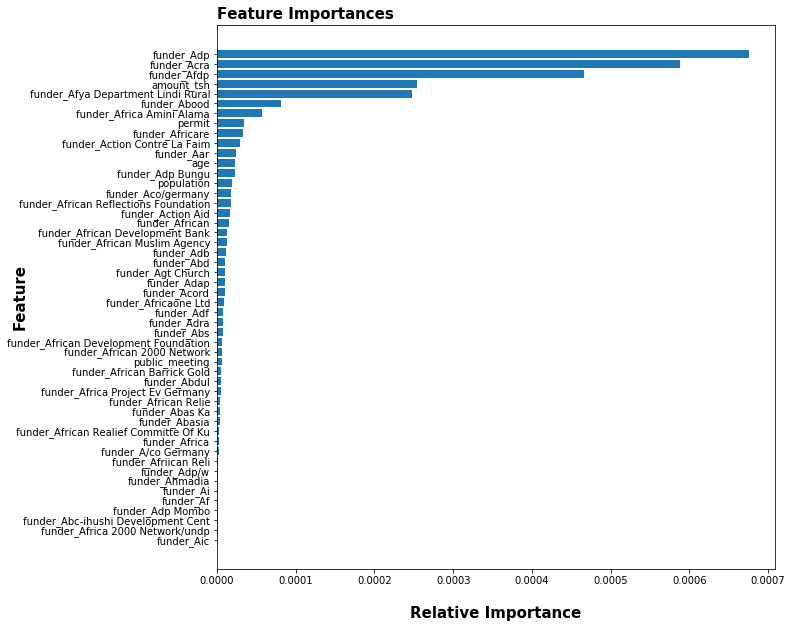

In [176]:
plt.figure(1,figsize=(10,10))
plt.title('Feature Importances',fontweight='bold',fontsize=15,loc='left')
ax1 = plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance',fontweight='bold',fontsize=15,labelpad = 20)
plt.ylabel('Feature',fontweight='bold',fontsize=15,labelpad = -20)

#t11 = ['Total Static Head','Permitted','Funder: Aar','Age','Population Served','Public Meeting','Funder: Abas Ka','Funder: Abasia','Funder: A/co Germany','Funder: Abc-Ihushi Dev Cent']
#plt.yticks(range(len(t11)), t11, size='large')

# # ax1[-1].set_color('C1') 
# # ax1[-2].set_color('C1') 
# ax1[-3].set_color('C1')
# ax1[-4].set_color('C1')
# # ax1[-5].set_color('C1')
# # ax1[-6].set_color('C1')
# ax1[-7].set_color('C1')
# ax1[-8].set_color('C1')
# ax1[-9].set_color('C1')
# ax1[-10].set_color('C1')

plt.savefig('images/featimportance{}.png'.format(n),bbox_inches='tight',pad_inches=0.5)

In [58]:
importances[indices]

Index(['installer_Accra', 'installer_GD&ID',
       'installer_Eastmeru medium School',
       'installer_DIOCESE OF MOUNT KILIMANJARO', 'funder_Lions', 'ward_Mbogwe',
       'installer_Kauzeni', 'ward_Katandala', 'funder_Ccp',
       'installer_Dr. Matobola',
       ...
       'ward_Pangani Magharibi', 'ward_Nyigogo', 'ward_Pasiansi',
       'ward_Nyamimange', 'ward_Partimbo', 'ward_Old Sumbawanga',
       'ward_Pemba Mnazi', 'ward_Pinyinyi', 'ward_Pasua',
       'ward_Old Moshi Mashariki'],
      dtype='object', length=5134)

In [57]:
features

Index(['amount_tsh', 'gps_height', 'population', 'age', 'public_meeting',
       'permit', 'funder_A/co Germany', 'funder_Aar', 'funder_Abas Ka',
       'funder_Abasia',
       ...
       'source_spring', 'source_unknown', 'source_class_surface',
       'source_class_unknown', 'waterpoint_type_communal standpipe',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
       'waterpoint_type_other'],
      dtype='object', length=5472)

In [69]:
test = zip(range(len(indices)), importances[indices])

In [72]:
test

In [74]:
print("Feature ranking:")

for f in range(X_train_ohe.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1640 (0.000000)
2. feature 2034 (0.000000)
3. feature 1978 (0.000000)
4. feature 1903 (0.000000)
5. feature 684 (0.000000)
6. feature 4570 (0.000000)
7. feature 2320 (0.000000)
8. feature 4042 (0.000000)
9. feature 136 (0.000000)
10. feature 1956 (0.000000)
11. feature 815 (0.000000)
12. feature 1683 (0.000000)
13. feature 2797 (0.000000)
14. feature 2355 (0.000000)
15. feature 2628 (0.000000)
16. feature 1682 (0.000000)
17. feature 2493 (0.000000)
18. feature 2100 (0.000000)
19. feature 595 (0.000000)
20. feature 2971 (0.000000)
21. feature 1914 (0.000000)
22. feature 355 (0.000000)
23. feature 1458 (0.000000)
24. feature 4253 (0.000000)
25. feature 2254 (0.000000)
26. feature 856 (0.000000)
27. feature 1273 (0.000000)
28. feature 1515 (0.000000)
29. feature 2364 (0.000000)
30. feature 399 (0.000000)
31. feature 2276 (0.000000)
32. feature 2793 (0.000000)
33. feature 2901 (0.000000)
34. feature 98 (0.000000)
35. feature 1251 (0.000000)
36. feature 239 (0.00